In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def subdivide(volume, x, y, z):
    if(np.sum(x) * np.sum(y) * np.sum(z) == 0):
        volume.fill(0)
        return volume
    
    if len(x) <= 1:
        return volume

    m = len(volume) // 2
    
    volume[:m, :m, :m] = subdivide(volume[:m, :m, :m], x[:m, :m], y[:m, :m], z[:m, :m])
    volume[:m, :m, m:] = subdivide(volume[:m, :m, m:], x[:m, :m], y[:m, m:], z[:m, m:])
    volume[:m, m:, :m] = subdivide(volume[:m, m:, :m], x[:m, m:], y[:m, :m], z[m:, :m])
    volume[:m, m:, m:] = subdivide(volume[:m, m:, m:], x[:m, m:], y[:m, m:], z[m:, m:])
    volume[m:, :m, :m] = subdivide(volume[m:, :m, :m], x[m:, :m], y[m:, :m], z[:m, :m])
    volume[m:, :m, m:] = subdivide(volume[m:, :m, m:], x[m:, :m], y[m:, m:], z[:m, m:])
    volume[m:, m:, :m] = subdivide(volume[m:, m:, :m], x[m:, m:], y[m:, :m], z[m:, :m])
    volume[m:, m:, m:] = subdivide(volume[m:, m:, m:], x[m:, m:], y[m:, m:], z[m:, m:])
    
    return volume

Recursive finished in 1.0288023948669434 seconds
Plotting ... (might take a while)


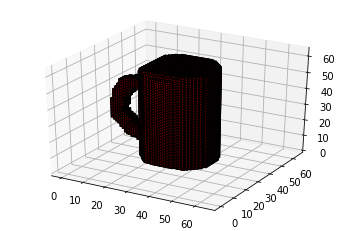

In [3]:
x = cv2.flip(cv2.imread("mug2.png", 0), 0)
y = cv2.flip(cv2.imread("mug1.png", 0), 0)
z = cv2.flip(cv2.imread("mug3.png", 0), 0)
d = len(x)

bounding_volume = np.ones((d,d,d), dtype=int)

start = time.time()
bounding_volume = subdivide(bounding_volume, x, y, z)
print(f"Recursive finished in {time.time() - start} seconds")

            
colors = np.empty(bounding_volume.shape, dtype=object)
colors[bounding_volume.astype(bool)] = 'red'

print("Plotting ... (might take a while)")
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(bounding_volume.T, facecolors=colors.T, edgecolor='k')

plt.show()